<a href="https://colab.research.google.com/github/springboardmentor2468a-lab/AgriYield/blob/RAJASRI_J/AgriYield_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
crop= pd.read_csv("Crop.csv")
fao= pd.read_csv("FAO(1).csv")

In [5]:
fao


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2001,2001,ha,5.692710e+05,A,Official figure,NaN
1,QCL,Crops and livestock products,356,India,5412,Yield,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2001,2001,kg/ha,4.303000e+02,A,Official figure,NaN
2,QCL,Crops and livestock products,356,India,5510,Production,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2001,2001,t,2.449430e+05,A,Official figure,NaN
3,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2002,2002,ha,5.470280e+05,A,Official figure,NaN
4,QCL,Crops and livestock products,356,India,5412,Yield,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2002,2002,kg/ha,2.968000e+02,A,Official figure,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5686,QCL,Crops and livestock products,356,India,5412,Yield,111.0,Wheat,2022,2022,kg/ha,3.537300e+03,A,Official figure,NaN
5687,QCL,Crops and livestock products,356,India,5510,Production,111.0,Wheat,2022,2022,t,1.077421e+08,A,Official figure,NaN
5688,QCL,Crops and livestock products,356,India,5312,Area harvested,111.0,Wheat,2023,2023,ha,3.140072e+07,A,Official figure,NaN
5689,QCL,Crops and livestock products,356,India,5412,Yield,111.0,Wheat,2023,2023,kg/ha,3.520700e+03,A,Official figure,NaN


In [6]:
crop

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [7]:
fao['Item'].unique()[:40]

array(['Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw',
       'Apples', 'Apricots', 'Areca nuts', 'Bananas', 'Barley',
       'Beans, dry', 'Cabbages', 'Cantaloupes and other melons',
       'Carrots and turnips', 'Cashew nuts, in shell', 'Cassava, fresh',
       'Castor oil seeds', 'Cauliflowers and broccoli', 'Cherries',
       'Chick peas, dry',
       'Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw',
       'Chillies and peppers, green (Capsicum spp. and Pimenta spp.)',
       'Cocoa beans', 'Coconuts, in shell', 'Coffee, green', 'Coir, raw',
       'Cucumbers and gherkins', 'Eggplants (aubergines)', 'Figs',
       'Ginger, raw', 'Grapes', 'Green garlic',
       'Groundnuts, excluding shelled', 'Jute, raw or retted',
       'Kenaf, and other textile bast fibres, raw or retted',
       'Lemons and limes', 'Lentils, dry', 'Lettuce and chicory',
       'Linseed', 'Maize (corn)', 'Mangoes, guavas and mangosteens',
       'Millet', 'Mushrooms a

In [8]:
for i in fao['Item'].unique():
    print(i)

Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw
Apples
Apricots
Areca nuts
Bananas
Barley
Beans, dry
Cabbages
Cantaloupes and other melons
Carrots and turnips
Cashew nuts, in shell
Cassava, fresh
Castor oil seeds
Cauliflowers and broccoli
Cherries
Chick peas, dry
Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw
Chillies and peppers, green (Capsicum spp. and Pimenta spp.)
Cocoa beans
Coconuts, in shell
Coffee, green
Coir, raw
Cucumbers and gherkins
Eggplants (aubergines)
Figs
Ginger, raw
Grapes
Green garlic
Groundnuts, excluding shelled
Jute, raw or retted
Kenaf, and other textile bast fibres, raw or retted
Lemons and limes
Lentils, dry
Lettuce and chicory
Linseed
Maize (corn)
Mangoes, guavas and mangosteens
Millet
Mushrooms and truffles
Natural rubber in primary forms
Nutmeg, mace, cardamoms, raw
Okra
Onions and shallots, dry (excluding dehydrated)
Oranges
Other beans, green
Other berries and fruits of the genus vaccinium n.e.c.
Other citrus fruit,

In [9]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [10]:
fao['Item'] = fao['Item'].str.split(r",|and")
fao = fao.explode('Item')

In [11]:
fao

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,Anise,2001,2001,ha,5.692710e+05,A,Official figure,NaN
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,badian,2001,2001,ha,5.692710e+05,A,Official figure,NaN
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,cori,2001,2001,ha,5.692710e+05,A,Official figure,NaN
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,er,2001,2001,ha,5.692710e+05,A,Official figure,NaN
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,cumin,2001,2001,ha,5.692710e+05,A,Official figure,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5686,QCL,Crops and livestock products,356,India,5412,Yield,111.0,Wheat,2022,2022,kg/ha,3.537300e+03,A,Official figure,NaN
5687,QCL,Crops and livestock products,356,India,5510,Production,111.0,Wheat,2022,2022,t,1.077421e+08,A,Official figure,NaN
5688,QCL,Crops and livestock products,356,India,5312,Area harvested,111.0,Wheat,2023,2023,ha,3.140072e+07,A,Official figure,NaN
5689,QCL,Crops and livestock products,356,India,5412,Yield,111.0,Wheat,2023,2023,kg/ha,3.520700e+03,A,Official figure,NaN


In [12]:
crop_mapping = {
    "Rice": "rice",
    "Maize (corn)": "maize",
    "Chick peas":"chickpea",
    "Pigeon peas":"pigeonpeas" ,
    "Beans":"mothbeans" ,
    "Lentils":"lentil" ,
    "Bananas":"banana" ,
    "Mangoes": "mango" ,
    "Grapes":"grapes" ,
    "Watermelons":"watermelon" ,
    "Cantaloupes ":"muskmelon",
    "Apples":"apple" ,
    "Oranges":"orange" ,
    "Papayas":"papaya" ,
    "Coconuts":"coconut" ,
    "Seed cotton":"cotton"  ,
    "Jute":"jute" ,
    "Coffee":"coffee"

}



In [13]:
len(crop_mapping)

18

In [14]:
fao['Crop']=fao['Item'].map(crop_mapping)

In [15]:
crop=crop.rename(columns={'label':'Crop'})

In [16]:
crop

,N,P,K,temperature,humidity,ph,rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [17]:
df_merged = crop.merge(
    fao,
    left_on="Crop",
    right_on="Crop",
    how="inner"
)

In [18]:
df_merged

,N,P,K,temperature,humidity,ph,rainfall,Crop,Domain Code,Domain,...,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,QCL,Crops and livestock products,...,Area harvested,113.0,Rice,2001,2001,ha,4.490000e+07,A,Official figure,NaN
1,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,QCL,Crops and livestock products,...,Yield,113.0,Rice,2001,2001,kg/ha,3.115800e+03,A,Official figure,NaN
2,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,QCL,Crops and livestock products,...,Production,113.0,Rice,2001,2001,t,1.399000e+08,A,Official figure,NaN
3,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,QCL,Crops and livestock products,...,Area harvested,113.0,Rice,2002,2002,ha,4.117610e+07,A,Official figure,NaN
4,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,QCL,Crops and livestock products,...,Yield,113.0,Rice,2002,2002,kg/ha,2.616300e+03,A,Official figure,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124195,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,QCL,Crops and livestock products,...,Yield,1610.0,Coffee,2022,2022,kg/ha,7.742000e+02,E,Estimated value,NaN
124196,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,QCL,Crops and livestock products,...,Production,1610.0,Coffee,2022,2022,t,3.404065e+05,I,Value imputed by a receiving agency,NaN
124197,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,QCL,Crops and livestock products,...,Area harvested,1610.0,Coffee,2023,2023,ha,4.378620e+05,I,Value imputed by a receiving agency,NaN
124198,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,QCL,Crops and livestock products,...,Yield,1610.0,Coffee,2023,2023,kg/ha,7.602000e+02,E,Estimated value,NaN


In [19]:
df_merged = df_merged[df_merged['Element'] == 'Production']

In [20]:
df_merged

,N,P,K,temperature,humidity,ph,rainfall,Crop,Domain Code,Domain,...,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
2,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,QCL,Crops and livestock products,...,Production,113.0,Rice,2001,2001,t,1.399000e+08,A,Official figure,NaN
5,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,QCL,Crops and livestock products,...,Production,113.0,Rice,2002,2002,t,1.077303e+08,A,Official figure,NaN
8,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,QCL,Crops and livestock products,...,Production,113.0,Rice,2003,2003,t,1.327890e+08,A,Official figure,NaN
11,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,QCL,Crops and livestock products,...,Production,113.0,Rice,2004,2004,t,1.246971e+08,A,Official figure,NaN
14,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,QCL,Crops and livestock products,...,Production,113.0,Rice,2005,2005,t,1.376901e+08,A,Official figure,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124187,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,QCL,Crops and livestock products,...,Production,1610.0,Coffee,2019,2019,t,3.195000e+05,A,Official figure,NaN
124190,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,QCL,Crops and livestock products,...,Production,1610.0,Coffee,2020,2020,t,2.980000e+05,A,Official figure,NaN
124193,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,QCL,Crops and livestock products,...,Production,1610.0,Coffee,2021,2021,t,3.340000e+05,A,Official figure,NaN
124196,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,QCL,Crops and livestock products,...,Production,1610.0,Coffee,2022,2022,t,3.404065e+05,I,Value imputed by a receiving agency,NaN


In [21]:
df_merged['Crop'].value_counts()

,count
Crop,
rice,2300
maize,2300
chickpea,2300
pigeonpeas,2300
mothbeans,2300
lentil,2300
banana,2300
mango,2300
grapes,2300


In [22]:
df_merged=df_merged.drop(columns=['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item','Year', 'Year Code','Unit', 'Flag', 'Flag Description', 'Note'])

In [23]:
df_merged

,N,P,K,temperature,humidity,ph,rainfall,Crop,Value
2,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1.399000e+08
5,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1.077303e+08
8,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1.327890e+08
11,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1.246971e+08
14,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1.376901e+08
...,...,...,...,...,...,...,...,...,...
124187,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,3.195000e+05
124190,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,2.980000e+05
124193,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,3.340000e+05
124196,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,3.404065e+05


In [24]:
df_merged.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
Crop,0
Value,0


In [25]:
df_merged.duplicated().sum()

np.int64(600)

In [26]:
df_merged=df_merged.drop_duplicates().reset_index(drop=True)

In [27]:
df_merged

,N,P,K,temperature,humidity,ph,rainfall,Crop,Value
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1.399000e+08
1,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1.077303e+08
2,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1.327890e+08
3,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1.246971e+08
4,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1.376901e+08
...,...,...,...,...,...,...,...,...,...
40795,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,3.195000e+05
40796,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,2.980000e+05
40797,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,3.340000e+05
40798,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,3.404065e+05


In [28]:
df_merged.describe()

,N,P,K,temperature,humidity,ph,rainfall,Value
count,40800.000000,40800.000000,40800.000000,40800.000000,40800.000000,40800.000000,40800.000000,4.080000e+04
mean,56.192917,54.492819,53.794338,25.751305,72.654245,6.456550,108.259152,1.584579e+07
std,37.952692,35.033789,54.699814,5.108231,20.818880,0.807169,58.388929,3.605361e+07
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,2.620000e+05
25%,24.000000,28.000000,22.000000,23.089749,60.275383,5.993514,66.293904,1.732250e+06
50%,44.000000,50.000000,35.000000,25.624466,80.499799,6.395001,96.515240,3.750000e+06
75%,91.000000,69.000000,52.000000,28.436471,90.449678,6.890760,145.417239,1.337366e+07
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,2.067270e+08


In [29]:
df_merged.nunique()

,0
N,136
P,117
K,73
temperature,1800
humidity,1800
ph,1800
rainfall,1800
Crop,18
Value,408


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols=["N","P","K","temperature","humidity","ph","rainfall","Value"]

In [31]:
Q1=df_merged[numeric_cols].quantile(0.25)
Q3=df_merged[numeric_cols].quantile(0.75)
IQR=Q3-Q1

final_clean=df_merged[~((df_merged[numeric_cols]<(Q1-1.5*IQR))|
                        (df_merged[numeric_cols]>(Q3+1.5*IQR))).any(axis=1)]
print("Before:",df_merged.shape)
print("After:",final_clean.shape)
print("Removed Rows:",df_merged.shape[0]-final_clean.shape[0])

Before: (40800, 9)
After: (29853, 9)
Removed Rows: 10947


In [32]:
final_clean.head()

,N,P,K,temperature,humidity,ph,rainfall,Crop,Value
2300,71,54,16,22.6136,63.690706,5.749914,87.759539,maize,13160200.0
2301,71,54,16,22.6136,63.690706,5.749914,87.759539,maize,11151700.0
2302,71,54,16,22.6136,63.690706,5.749914,87.759539,maize,14984300.0
2303,71,54,16,22.6136,63.690706,5.749914,87.759539,maize,14172000.0
2304,71,54,16,22.6136,63.690706,5.749914,87.759539,maize,14709900.0


In [33]:
len(final_clean)

29853

In [34]:
final_clean['Crop'].value_counts()

,count
Crop,
lentil,2300
jute,2300
watermelon,2300
coconut,2300
cotton,2300
mango,2208
muskmelon,2200
coffee,2200
pigeonpeas,2116


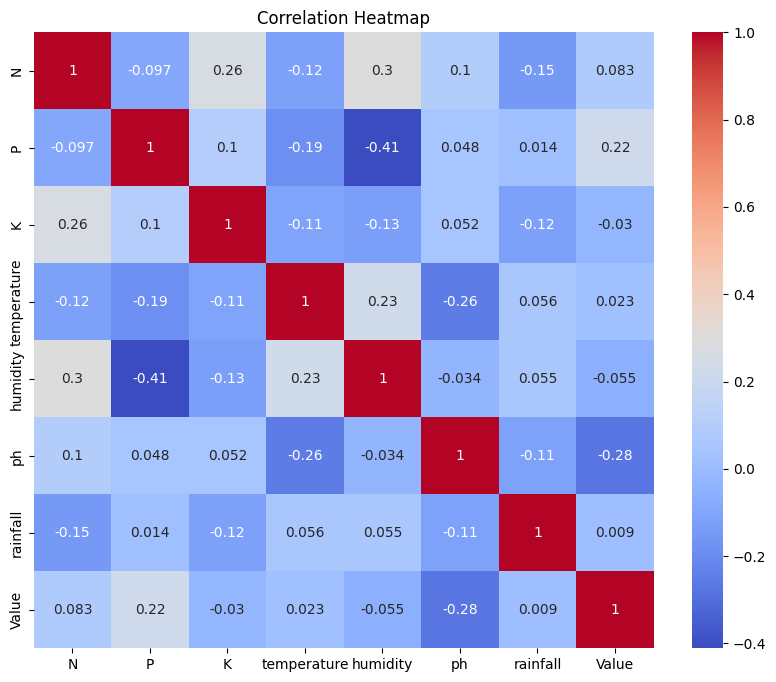

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(final_clean[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

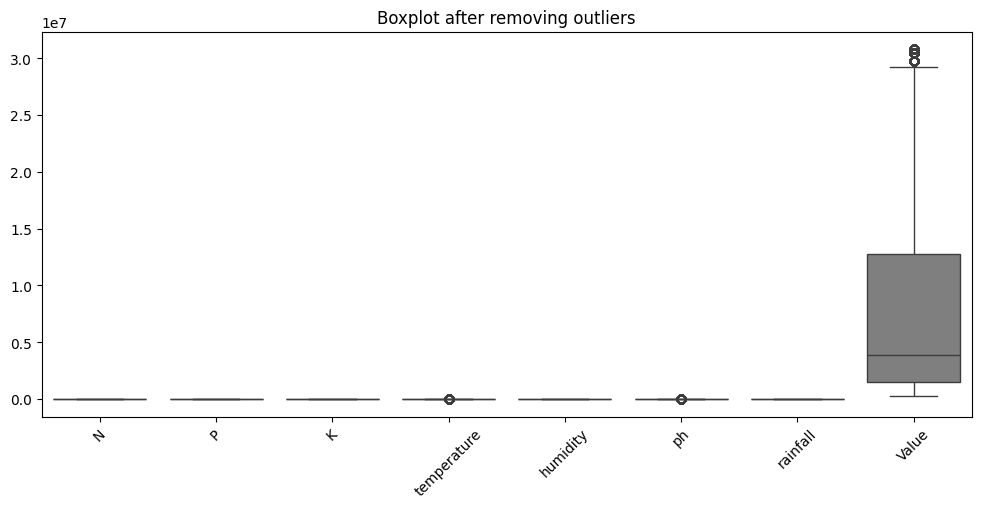

In [36]:
plt.figure(figsize=(12,5))
sns.boxplot(data=final_clean[numeric_cols])
plt.title("Boxplot after removing outliers")
plt.xticks(rotation=45)
plt.show()

In [37]:
len(final_clean)

29853

In [38]:
print("--- Model Training ---")

print()
print("Preparing Training Data...")
print()


X = final_clean.drop(columns=['Value', 'Element'], errors='ignore')
y = final_clean['Value']


X = pd.get_dummies(X, columns=['Crop'], drop_first=False)
trained_columns = X.columns
print(f"Features Generated: {X.shape[1]}")
print()


print(X.columns.tolist())


--- Model Training ---

Preparing Training Data...

Features Generated: 22

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'Crop_banana', 'Crop_chickpea', 'Crop_coconut', 'Crop_coffee', 'Crop_cotton', 'Crop_jute', 'Crop_lentil', 'Crop_maize', 'Crop_mango', 'Crop_mothbeans', 'Crop_muskmelon', 'Crop_orange', 'Crop_papaya', 'Crop_pigeonpeas', 'Crop_watermelon']


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

print("\n--- Train Test Split ---")


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Train Shape: {X_train.shape}")
print(f"Test Shape : {X_test.shape}")

print("\n--- Linear Regression Model Training ---")


lr_model = LinearRegression()


lr_model.fit(X_train, y_train)

print("✅Model Training Completed.")

print("\n--- Model Evaluation ---")


y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)


print("Train R2:", r2_score(y_train, y_train_pred))
print("Test R2 :", r2_score(y_test, y_test_pred))
print("MAE     :", mean_absolute_error(y_test, y_test_pred))
print("RMSE    :", np.sqrt(mean_squared_error(y_test, y_test_pred)))





--- Train Test Split ---
Train Shape: (23882, 22)
Test Shape : (5971, 22)

--- Linear Regression Model Training ---
✅Model Training Completed.

--- Model Evaluation ---
Train R2: 0.8697562601112234
Test R2 : 0.8639410616511778
MAE     : 1861304.943227931
RMSE    : 3046317.0288844947


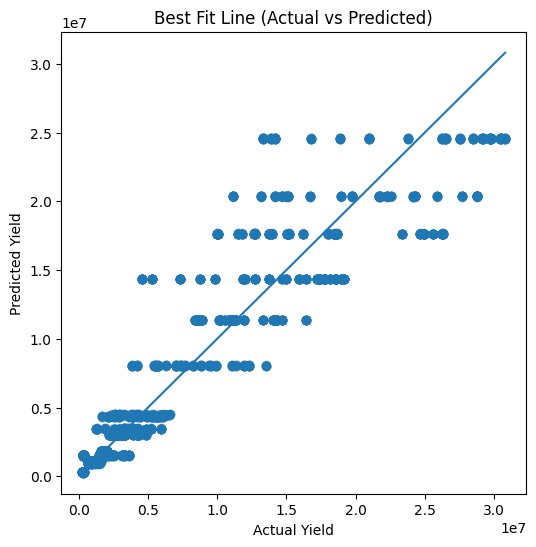

In [40]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Best Fit Line (Actual vs Predicted)")
plt.show()


In [41]:
import joblib

print(f"Saving object type: {type(lr_model)}")

joblib.dump(lr_model, "linear_regression_crop_yield_model.joblib", compress=3)


joblib.dump(trained_columns, "crop_label_encoder_columns.pkl")

print(" ✅Model successfully saved!")

Saving object type: <class 'sklearn.linear_model._base.LinearRegression'>
 ✅Model successfully saved!


In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


print("\nRandom Forest Model Training")


rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)


rf_model.fit(X_train, y_train)

print("✅Random Forest Training Completed.")



Random Forest Model Training
✅Random Forest Training Completed.


In [43]:
print("\n--- Random Forest Evaluation ---")

# Predictions
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

# Metrics
print("Train R2:", r2_score(y_train, rf_train_pred))
print("Test R2 :", r2_score(y_test, rf_test_pred))
print("MAE     :", mean_absolute_error(y_test, rf_test_pred))
print("RMSE    :", np.sqrt(mean_squared_error(y_test, rf_test_pred)))



--- Random Forest Evaluation ---
Train R2: 0.871296246694185
Test R2 : 0.8490220520556317
MAE     : 1956029.4010818768
RMSE    : 3208989.664831531


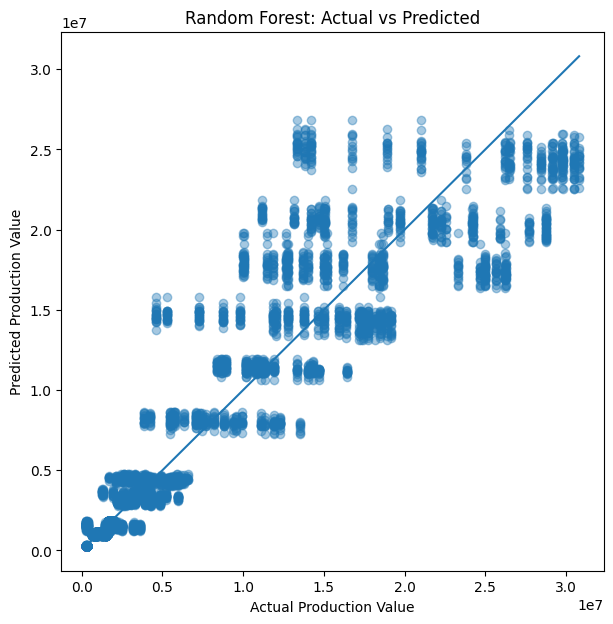

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(y_test, rf_test_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '-')

plt.xlabel("Actual Production Value")
plt.ylabel("Predicted Production Value")
plt.title("Random Forest: Actual vs Predicted")
plt.show()

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [46]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV


In [47]:
xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42
)
param_grid_xgb = {
    'n_estimators': [100],
    'max_depth': [3, 5],
    'learning_rate': [0.1]
}



In [48]:
grid_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    cv=3,
    scoring='r2',
    n_jobs=-1
)

grid_xgb.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [3, 5],
                         'n_estimators': [100]},
             scoring='r2')

In [49]:
best_xgb = grid_xgb.best_estimator_

print("Best XGB Parameters:", grid_xgb.best_params_)

Best XGB Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [50]:
xgb_train_pred = best_xgb.predict(X_train)
xgb_test_pred = best_xgb.predict(X_test)

print("\n✅Tuned XGBoost")
print("Train R2:", r2_score(y_train, xgb_train_pred))
print("Test R2 :", r2_score(y_test, xgb_test_pred))
print("MAE     :", mean_absolute_error(y_test, xgb_test_pred))
print("RMSE    :", np.sqrt(mean_squared_error(y_test, xgb_test_pred)))



✅Tuned XGBoost
Train R2: 0.8677901557854648
Test R2 : 0.8596895247451779
MAE     : 1932211.0701616148
RMSE    : 3093546.20553248


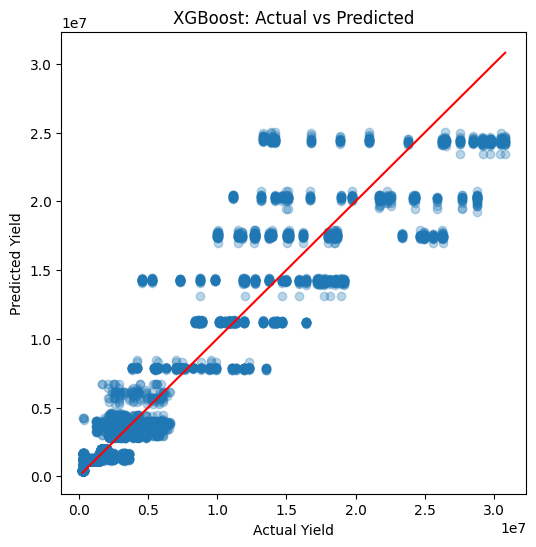

In [51]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, xgb_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r')
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("XGBoost: Actual vs Predicted")
plt.show()

In [52]:
# Get best XGBoost model
best_xgb = grid_xgb.best_estimator_

# Predictions
y_train_pred_xgb = best_xgb.predict(X_train)
y_test_pred_xgb = best_xgb.predict(X_test)



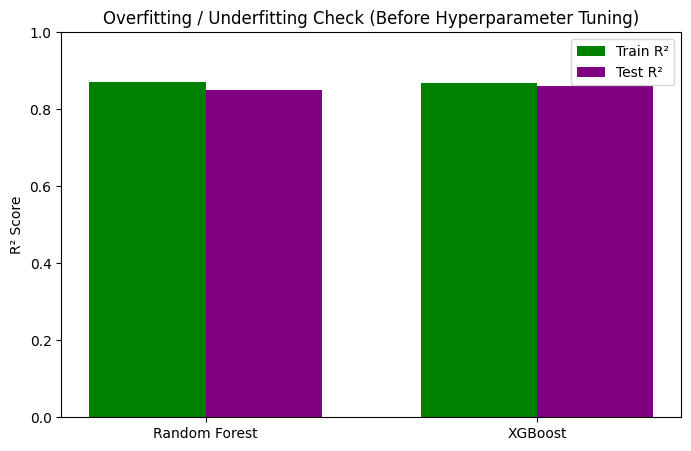

In [78]:

models = ['Random Forest', 'XGBoost']


train_scores = [
    r2_score(y_train, rf_train_pred),
    r2_score(y_train, y_train_pred_xgb)
]

test_scores = [
    r2_score(y_test, rf_test_pred),
    r2_score(y_test, y_test_pred_xgb)
]


x = np.arange(len(models))
bar_width = 0.35

plt.figure(figsize=(8,5))

# Train
plt.bar(x - bar_width/2, train_scores, bar_width, label='Train R²',color='green')

# Test
plt.bar(x + bar_width/2, test_scores, bar_width, label='Test R²',color='purple')


plt.xticks(x, models)
plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.title("Overfitting / Underfitting Check (Before Hyperparameter Tuning)")
plt.legend()

plt.show()


In [57]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (23882, 22)
X_test shape: (5971, 22)
y_train shape: (23882,)
y_test shape: (5971,)


In [63]:
from sklearn.metrics import r2_score

# Predictions using trained Random Forest model
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

# R2 scores
rf_train_r2 = r2_score(y_train, rf_train_pred)
rf_test_r2 = r2_score(y_test, rf_test_pred)

print("Random Forest Train R2:", rf_train_r2)
print("Random Forest Test R2:", rf_test_r2)



Random Forest Train R2: 0.8712512313256698
Random Forest Test R2: 0.8489906024489419


In [68]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)

print("✅XGBoost model fitted successfully")


✅XGBoost model fitted successfully


In [69]:
from sklearn.metrics import r2_score

# XGBoost predictions
xgb_train_pred = xgb.predict(X_train)
xgb_test_pred = xgb.predict(X_test)

# R2 scores
xgb_train_r2 = r2_score(y_train, xgb_train_pred)
xgb_test_r2 = r2_score(y_test, xgb_test_pred)

print("XGBoost Train R2:", xgb_train_r2)
print("XGBoost Test R2:", xgb_test_r2)


XGBoost Train R2: 0.8710951235338911
XGBoost Test R2: 0.8515221068858865


In [71]:
from sklearn.metrics import r2_score

train_r2 = [
    r2_score(y_train, rf_train_pred),
    r2_score(y_train, xgb_train_pred)
]

test_r2 = [
    r2_score(y_test, rf_test_pred),
    r2_score(y_test, xgb_test_pred)
]

print("Train R2 Scores:", train_r2)
print("Test R2 Scores:", test_r2)


Train R2 Scores: [0.8712512313256698, 0.8710951235338911]
Test R2 Scores: [0.8489906024489419, 0.8515221068858865]


In [74]:
# Map existing predictions to *_tuned names
rf_train_pred_tuned = rf_train_pred
rf_test_pred_tuned  = rf_test_pred

xgb_train_pred_tuned = xgb_train_pred
xgb_test_pred_tuned  = xgb_test_pred

print("✅Tuned variable names fixed successfully")


✅Tuned variable names fixed successfully


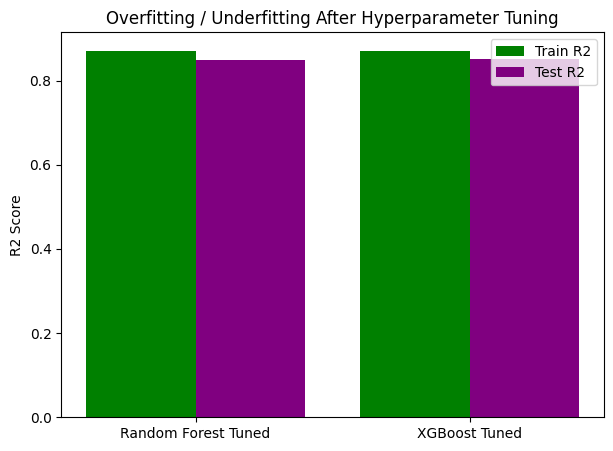

In [77]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

models = ['Random Forest Tuned', 'XGBoost Tuned']

train_r2 = [
    r2_score(y_train, rf_train_pred_tuned),
    r2_score(y_train, xgb_train_pred_tuned)
]

test_r2 = [
    r2_score(y_test, rf_test_pred_tuned),
    r2_score(y_test, xgb_test_pred_tuned)
]

x = range(len(models))

plt.figure(figsize=(7,5))
plt.bar(x, train_r2, width=0.4, label='Train R2',color='green')
plt.bar([i + 0.4 for i in x], test_r2, width=0.4, label='Test R2',color='purple')

plt.xticks([i + 0.2 for i in x], models)
plt.ylabel("R2 Score")
plt.title("Overfitting / Underfitting After Hyperparameter Tuning")
plt.legend()
plt.show()


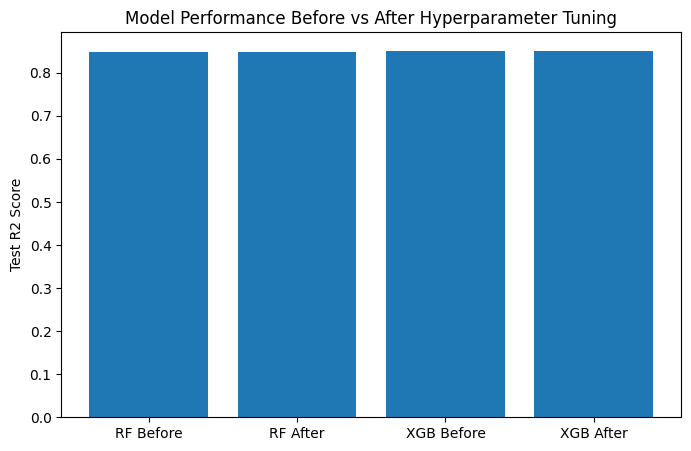

In [79]:
before_rf = 0.8490
after_rf  = r2_score(y_test, rf_test_pred_tuned)

before_xgb = 0.8514
after_xgb  = r2_score(y_test, xgb_test_pred_tuned)

labels = ['RF Before', 'RF After', 'XGB Before', 'XGB After']
scores = [before_rf, after_rf, before_xgb, after_xgb]

plt.figure(figsize=(8,5))
plt.bar(labels, scores)
plt.ylabel("Test R2 Score")
plt.title("Model Performance Before vs After Hyperparameter Tuning")
plt.show()


In [80]:
import joblib
import pandas as pd
import numpy as np

def check_model_on_input(n, p, k, temp, hum, ph, rain, crop):


    model = joblib.load("linear_regression_crop_yield_model.joblib")


    cols = joblib.load("crop_label_encoder_columns.pkl")


    row = pd.DataFrame(np.zeros((1, len(cols))), columns=cols)


    row['N'] = n
    row['P'] = p
    row['K'] = k
    row['temperature'] = temp
    row['humidity'] = hum
    row['ph'] = ph
    row['rainfall'] = rain


    crop_col = f"Crop_{crop.lower()}"
    if crop_col in cols:
        row[crop_col] = 1
    else:
        print(f" Crop '{crop}' model ke training data me nahi tha")


    prediction = model.predict(row)[0]

    print(f" Predicted Yield for {crop}: {prediction:.2f} Kilogram")


In [83]:
import joblib

joblib.dump(xgb, "xgboost_crop_yield_model.joblib")

print("✅XGBoost model saved successfully")


✅XGBoost model saved successfully


In [87]:
import joblib
from sklearn.metrics import r2_score

# Load the saved XGBoost model
xgb_loaded = joblib.load("xgboost_crop_yield_model.joblib")

# Test prediction using loaded model
xgb_loaded_test_pred = xgb_loaded.predict(X_test)

# R2 score check
loaded_test_r2 = r2_score(y_test, xgb_loaded_test_pred)

print("✅Loaded XGBoost Test R2:", loaded_test_r2)


✅Loaded XGBoost Test R2: 0.8515221068858865


In [96]:
import joblib
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Load model
xgb_loaded = joblib.load("xgboost_crop_yield_model.joblib")

# Predict
y_pred_loaded = xgb_loaded.predict(X_test)

print("R2:", r2_score(y_test, y_pred_loaded))
print("MAE:", mean_absolute_error(y_test, y_pred_loaded))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_loaded)))



R2: 0.8515221068858865
MAE: 1935277.6725416598
RMSE: 3182309.808628032


In [97]:
check_model_on_input(
    n=90,
    p=42,
    k=43,
    temp=20.8,
    hum=82.0,
    ph=6.5,
    rain=202.9,
    crop="Coffee"
)

 Predicted Yield for Coffee: 310090.81 Kilogram


In [98]:
check_model_on_input(
    n=90,
    p=42,
    k=43,
    temp=20.8,
    hum=82.0,
    ph=6.5,
    rain=202.9,
    crop="orange"
)


 Predicted Yield for orange: 3351879.26 Kilogram


In [101]:
import joblib

def get_available_crops():
    cols = joblib.load("crop_label_encoder_columns.pkl")
    crops = [c.replace('Crop_', '').capitalize() for c in cols if c.startswith('Crop_')]
    print("🌾Crops avaliable is:")
    print("-" * 40)
    for i, crop in enumerate(sorted(crops), 1):
        print(f"{i}. {crop}")
    print("-" * 40)
    print(f"Total Crops: {len(crops)}")
get_available_crops()

🌾Crops avaliable is:
----------------------------------------
1. Banana
2. Chickpea
3. Coconut
4. Coffee
5. Cotton
6. Jute
7. Lentil
8. Maize
9. Mango
10. Mothbeans
11. Muskmelon
12. Orange
13. Papaya
14. Pigeonpeas
15. Watermelon
----------------------------------------
Total Crops: 15
